In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
df = pd.read_csv('deliveries.csv')
data = pd.read_csv('matches.csv')

### Teams scored 200 or more than 200 runs

In [11]:
high_scores=df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(11415,'total_runs')
k= high_scores["batting_team"].value_counts().reset_index()
k.columns=["Team","No of times scored 200 or more"]
t1 = go.Bar(x=k['Team'],y=k['No of times scored 200 or more'])
fig = tools.make_subplots(rows=1, cols=1, subplot_titles=('At Ist Innings'))
fig.append_trace(t1, 1, 1)
iplot(fig)



### Percentage of match win to toss winn

In [17]:
tw=data["toss_winner"].value_counts().sum()
win_toss_win_match=data[(data['toss_winner'] == data['winner'])]
s= pd.DataFrame({"Team won the toss":[ win_toss_win_match.shape[0],]}, index = ['Won match'])
percentage=(df["Team won the toss"]/tw)*100
labels=["won","lost"]
values=["393","360"]
d=[go.Pie(labels=labels,values=values)]
fig=go.Figure(d)
fig.show()



### Top teams became champions

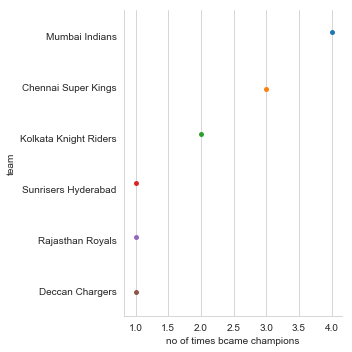

In [20]:
win_season=data.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
win_season=win_season['winner'].value_counts().reset_index()
win_season.columns=["team","no of times bcame champions"]
sns.set_style("whitegrid")
sns.catplot(x="no of times bcame champions",y="team",data=win_season)

### Season wise winners

<BarContainer object of 12 artists>

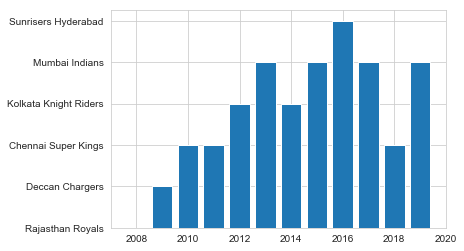

In [27]:
season_winners=data.groupby('season')['season','winner'].tail(1)
season_winners=season_winners.sort_values('season',ascending = True)
plt.bar("season","winner",data=season_winners)